# Import the code needed to plot the confusion matrix 

In [1]:
import utils

# Add this to your inference notebook

ground truth list :  [0 1 2 1 2 0 0]
predicted list :  [0 1 2 1 2 0 0]


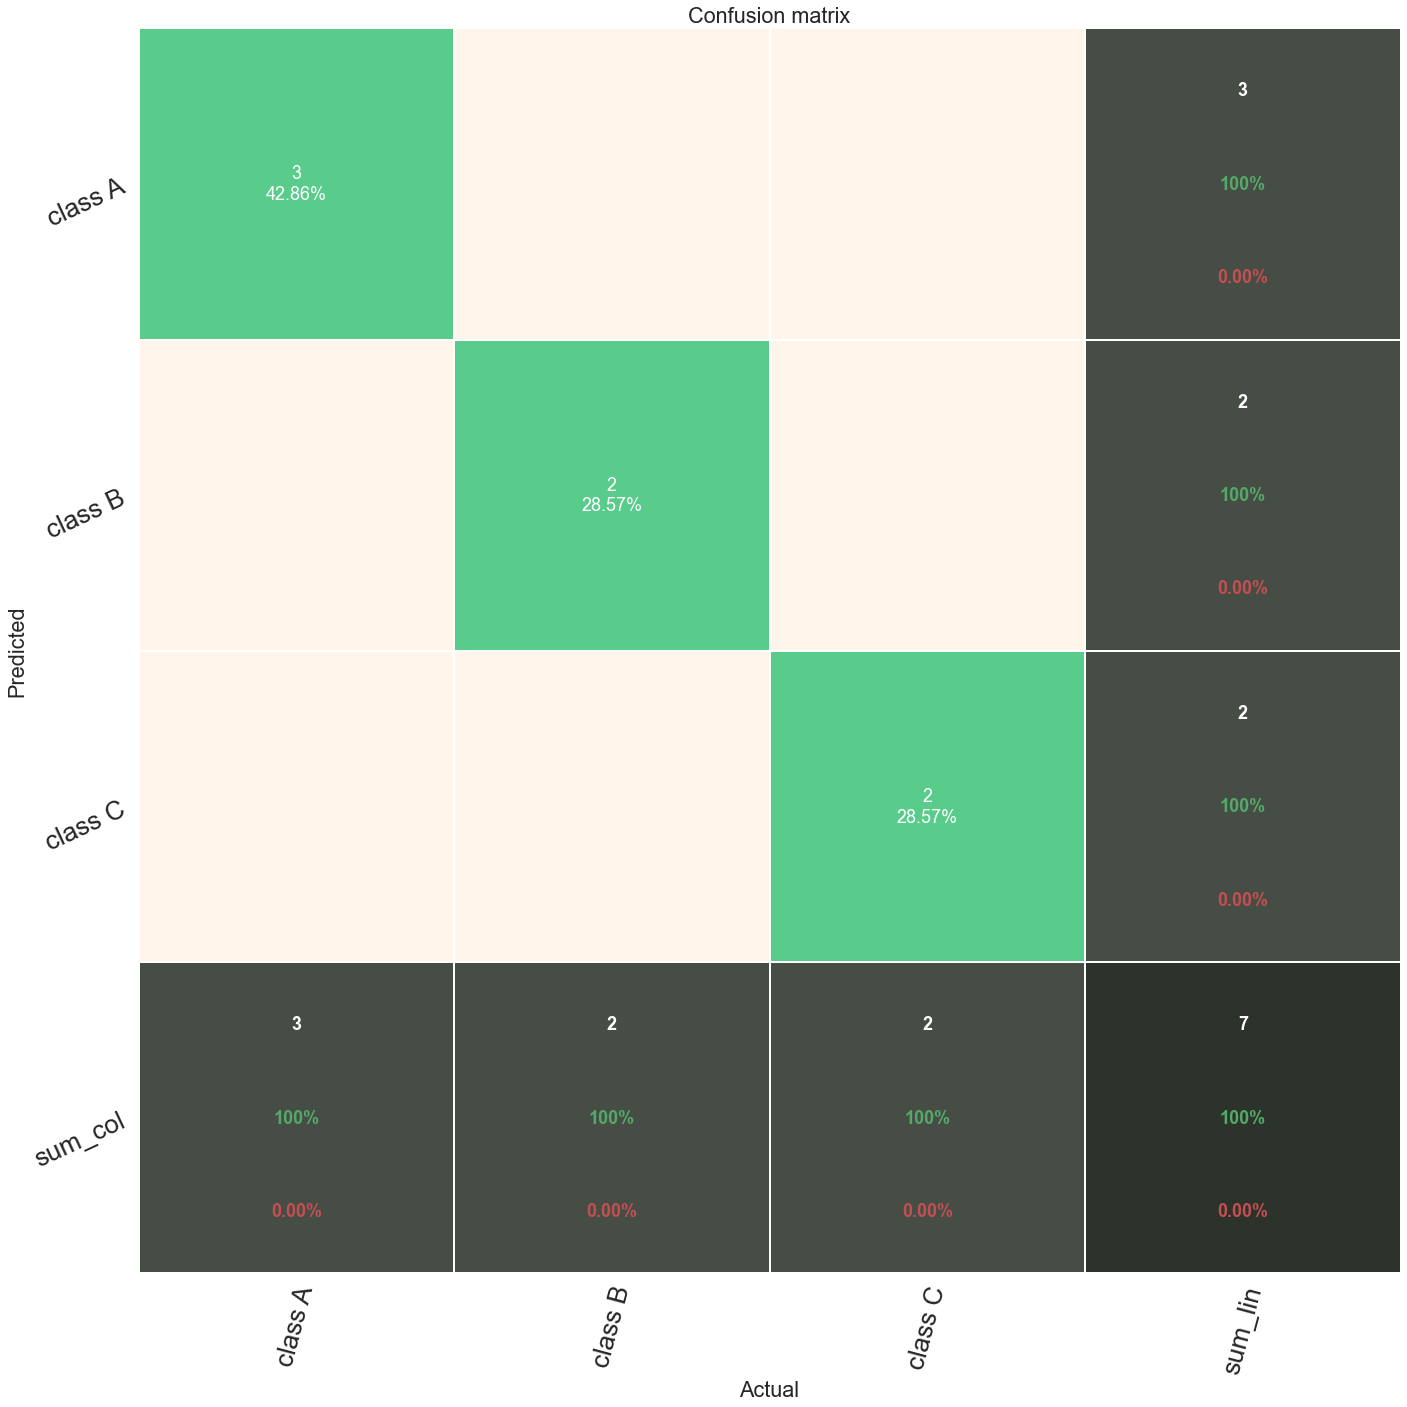

In [114]:
# an example of plotting confusion matrix.
# the first step consists of computing ground-truth and prediction vectors for all images.
# using these vectors, the plot_confusion_matrix_from_data function plots the CM and computes tps fps and fns
import pandas as pd
import numpy as np
import os 

#ground-truth and predictions lists
gt_tot = np.array([])
pred_tot = np.array([])
#mAP list
mAP_ = []
"""
#compute gt_tot, pred_tot and mAP for each image in the test dataset
for image_id in dataset.image_ids:
    image, image_meta, gt_class_id, gt_bbox, gt_mask =\
        modellib.load_image_gt(dataset, config, image_id, use_mini_mask=False)
    info = dataset.image_info[image_id]

    # Run the model
    results = model.detect([image], verbose=1)
    r = results[0]
    
    #compute gt_tot and pred_tot
    gt, pred = utils.gt_pred_lists(gt_class_id, gt_bbox, r['class_ids'], r['rois'])
    gt_tot = np.append(gt_tot, gt)
    pred_tot = np.append(pred_tot, pred)
    
    #precision_, recall_, AP_ 
    AP_, precision_, recall_, overlap_ = utils.compute_ap(gt_bbox, gt_class_id, gt_mask,
                                          r['rois'], r['class_ids'], r['scores'], r['masks'])
    #check if the vectors len are equal
    print("the actual len of the gt vect is : ", len(gt_tot))
    print("the actual len of the pred vect is : ", len(pred_tot))
    
    mAP_.append(AP_)
    print("Average precision of this image : ",AP_)
    print("The actual mean average precision for the whole images (matterport methode) ", sum(mAP_)/len(mAP_))
    print("Ground truth object : "+dataset.class_names[gt])
    print("Predicted object : "+dataset.class_names[pred])
  """  
gt_tot=gt_tot.astype(int)
pred_tot=pred_tot.astype(int)
#save the vectors of gt and pred
save_dir = "output"
gt_pred_tot_json = {"gt_tot" : gt_tot, "pred_tot" : pred_tot}
df = pd.DataFrame(gt_pred_tot_json)
if not os.path.exists(save_dir):
    os.makedirs(save_dir)
df.to_json(os.path.join(save_dir,"gt_pred_test.json"))
    
#print the confusion matrix and compute true postives, false positives and false negative for each class: 
#ps : you can controle the figure size and text format by choosing the right values
#tp, fp, fn = utils.plot_confusion_matrix_from_data(gt_tot, pred_tot, dataset.class_names, fz=18, figsize=(20,20), lw=0.5)

###########################################################################################################################

#since in this notebook i didnt run the loop above, here is an example of plotting using manual generated vectors :
#let 0 be the background class
#gt_tot=[1,2,3,1,2,3,1,2,3,1,2,3,1,2,3,0,1,2,3,0,1,2,3,0,1,2,0]
#pred_tot=[1,2,3,3,2,1,1,2,3,1,2,3,1,2,0,2,2,2,3,1,0,0,3,2,1,2,0]

#supose we have 1 image containing the gt classes bellow :
gt_class_id = np.array([0,1,2,0,1,2])
#with the bbox :
gt_bbox = np.array([np.array([10,100,20,200]),np.array([100,10,200,20]),np.array([110,15,220,25]),np.array([20,200,20,200]),
                    np.array([90,15,220,20]),np.array([100,10,150,20])])
#and the model detected the classes : 
#pred_class_id = np.array([2,3,2,3,2,3])
#with the bbox : 
#pred_bbox = np.array([np.array([100,10,200,20]),np.array([110,15,220,25]),np.array([90,15,220,20]),np.array([101,20,100,21]),
#                    np.array([500,20,1,20]),np.array([100,10,150,20])])

pred_class_id = np.array([0,1,2,0,1,2])
#with the bbox :
pred_bbox = np.array([np.array([10,100,20,200]),np.array([100,10,200,20]),np.array([110,15,220,25]),np.array([20,200,20,200]),
                    np.array([90,15,220,20]),np.array([100,10,150,20])])

#for this image, the gt and pred lists are:    
gt, pred = utils.gt_pred_lists(gt_class_id, gt_bbox, pred_class_id, pred_bbox,iou_tresh=0.9)
gt_tot = np.append(gt_tot, gt)
pred_tot = np.append(pred_tot, pred)

print("ground truth list : ",gt_tot)
print("predicted list : ",pred_tot)

#here i didnt set the columns list, since in the code if columns is note specified 
#it generates automatically a list from "class A" to "class ..". in this example, class A should be the background
#Note : class A is the backround in this example
tp,fp,fn=utils.plot_confusion_matrix_from_data(gt_tot,pred_tot,fz=18, figsize=(20,20), lw=1)

In [105]:
print("tp for each class :",tp)
print("fp for each class :",fp)
print("fn for each class :",fn)

#eliminate the background class (class A) from tps fns and fns lists since it doesn't concern us anymore : 
del tp[0]
del fp[0]
del fn[0]
print("\n########################\n")
print("tp for each class :",tp)
print("fp for each class :",fp)
print("fn for each class :",fn)

tp for each class : [0, 1, 4, 2]
fp for each class : [1, 1, 4, 4]
fn for each class : [1, 1, 4, 4]

########################

tp for each class : [1, 4, 2]
fp for each class : [1, 4, 4]
fn for each class : [1, 4, 4]


# Test dataset

In [118]:
# Canclini data
import json

In [119]:
# Reading ground true annotations
with open('./data/canclini_test_repetitive.json') as json_file:
    gt_test = json.load(json_file)
# Reading predicted annotations
with open('./data/trained_test2017_pred_60_repetitive.json') as json_file:
    pred_test = json.load(json_file)


In [120]:
df_gt_anno = pd.DataFrame(gt_test["annotations"])
df_gt_imgs = pd.DataFrame(gt_test["images"])
df_gt_cat = pd.DataFrame(gt_test["categories"])
df_gt_anno

,segmentation,area,iscrowd,image_id,bbox,category_id,id
0,"[[3, 426, 129, 416, 222, 422, 323, 416, 565, 4...",597373.0,0,6,"[0.0, 271.0, 1440.0, 571.0]",1,16
1,"[[803, 308, 671, 254, 503, 236, 509, 178, 671,...",17153.0,0,6,"[502.0, 178.0, 313.0, 131.0]",4,17
2,"[[246, 186, 244, 216, 300, 232, 345, 228, 343,...",2636.0,0,6,"[244.0, 186.0, 101.0, 47.0]",4,18
3,"[[1443, 1078, 1198, 1073, 1143, 366, 515, 543,...",628934.0,0,8,"[389.0, 0.0, 1051.0, 1078.0]",3,21
4,"[[0, 439, 53, 449, 119, 422, 187, 459, 252, 46...",444775.0,0,8,"[0.0, 351.0, 1174.0, 490.0]",1,22
...,...,...,...,...,...,...,...
146,"[[0, 124, 167, 137, 368, 137, 432, 157, 648, 2...",692511.0,0,465,"[0.0, 124.0, 1440.0, 551.0]",1,687
147,"[[0, 323, 1443, 364, 1439, 331, 0, 288]]",48942.0,0,466,"[0.0, 288.0, 1440.0, 76.0]",4,688
148,"[[0, 659, 952, 681, 1446, 716, 1444, 928, 0, 9...",351518.0,0,468,"[0.0, 659.0, 1440.0, 268.0]",1,690
149,"[[456, 1068, 476, 1068, 476, 1082, 456, 1082]]",252.0,0,471,"[455.0, 1068.0, 21.0, 12.0]",4,696


In [121]:
df_pred = pd.DataFrame(pred_test)
df_pred

,img_id,annotations
0,20185415_5a03d6335c9911ebbb738fc01aef18ab.png,"[{'bbox': [578, 607, 15, 20], 'category_id': 4..."
1,20185413_ce53fa535f9d11eba1198fc01aef18ab.png,"[{'bbox': [0, 781, 1440, 289], 'category_id': ..."
2,20185417_23d07d0a5c9a11eba2468fc01aef18ab.png,"[{'bbox': [710, 54, 26, 19], 'category_id': 4,..."
3,20185418_8b492d055c9a11eb88a38fc01aef18ab.png,"[{'bbox': [361, 111, 13, 16], 'category_id': 4..."
4,20185412_9f0a96df607111eba5768fc01aef18ab.png,"[{'bbox': [368, 0, 1071, 621], 'category_id': ..."
...,...,...
91,20185411_697bd729606611eb90078fc01aef18ab.png,[]
92,20185428_b732b2ff5f3b11ebb73b8fc01aef18ab.png,"[{'bbox': [0, 13, 732, 1066], 'category_id': 3..."
93,20185418_88a226995c9911ebac638fc01aef18ab.png,"[{'bbox': [293, 104, 14, 31], 'category_id': 4..."
94,20185420_9c1708665fa411eba2078fc01aef18ab.png,"[{'bbox': [118, 501, 1310, 451], 'category_id'..."


In [127]:
#ground-truth and predictions lists
gt_tot = np.array([])
pred_tot = np.array([])
#mAP list
mAP_ = []

for i in range(len(df_pred)): #len(df_pred)
    gt_class_id = []
    gt_bbox = []
    pred_class_id = []
    pred_bbox = []
    img_name = df_pred['img_id'][i]
    #Extract ground thruth bboxes and cats
    if df_gt_imgs[df_gt_imgs["file_name"]==img_name]["id"].values.shape[0]>0:
        id_img = df_gt_imgs[df_gt_imgs["file_name"]==img_name]["id"].values[0]
        df_filtered = df_gt_anno[df_gt_anno["image_id"]==id_img].reset_index(drop=True)
        for j in range(len(df_filtered)):
            gt_class_id.append(df_filtered['category_id'][j])
            bbox = [df_filtered["bbox"][j][0],
            df_filtered["bbox"][j][1],
            df_filtered["bbox"][j][0]+df_filtered["bbox"][j][2],
            df_filtered["bbox"][j][1]+df_filtered["bbox"][j][3]]
            gt_bbox.append(bbox)
            #gt_bbox.append(df_filtered['bbox'][j])
        # Extract predicted bboxes and cat
        for dic in df_pred["annotations"][i]:
            pred_class_id.append(dic['category_id'])
            # Transform bbox to corners
            bbox = [dic["bbox"][0], dic["bbox"][1],
            dic["bbox"][0]+dic["bbox"][2],
            dic["bbox"][1]+dic["bbox"][3]]
            pred_bbox.append(bbox)
            #pred_bbox.append(dic["bbox"]) 

        # Visualization 

    gt, pred = utils.gt_pred_lists(gt_class_id, gt_bbox, pred_class_id, pred_bbox, iou_tresh = 0.3)
    gt_tot = np.append(gt_tot, gt)
    pred_tot = np.append(pred_tot, pred)

print("ground truth list : ",gt_tot)
print("predicted list : ",pred_tot)

ground truth list :  [4. 0. 0. 1. 4. 0. 4. 0. 0. 0. 3. 1. 0. 0. 1. 0. 3. 4. 4. 4. 0. 0. 4. 4.
 0. 1. 0. 3. 1. 4. 4. 1. 0. 1. 3. 4. 0. 4. 0. 1. 4. 4. 4. 4. 4. 4. 0. 0.
 4. 1. 0. 4. 0. 1. 0. 0. 1. 0. 4. 1. 0. 4. 0. 4. 4. 0. 3. 1. 1. 1. 3. 4.
 1. 0. 1. 4. 1. 0. 4. 4. 0. 3. 3. 1. 4. 4. 4. 4. 4. 0. 0. 0. 4. 4. 4. 0.
 1. 1. 4. 4. 0. 1. 4. 0. 0. 1. 0. 4. 0. 3. 1. 0. 1. 2. 2. 2. 2. 2. 2. 2.
 2. 2. 2. 2. 2. 2. 3. 0. 1. 0. 4. 0. 4. 1. 4. 3. 1. 1. 4. 4. 4. 1. 4. 1.
 3. 5. 1. 2. 1. 2. 2. 2. 2. 3. 0. 3. 1. 1. 3. 4. 1. 0. 0. 3. 1. 1. 1. 0.
 1. 0. 4. 1. 0. 0. 0. 3. 1. 0. 0. 1. 1. 1. 3. 3. 1. 4. 1. 1. 0. 3. 1. 1.
 4. 0. 1. 0. 4. 0. 1. 1. 4. 4. 4. 1. 3. 3. 1. 0. 4. 1. 0. 0. 1. 0.]
predicted list :  [0. 4. 4. 1. 4. 4. 0. 4. 4. 4. 3. 0. 4. 3. 1. 4. 3. 0. 0. 0. 4. 4. 4. 0.
 4. 1. 4. 3. 1. 0. 0. 1. 4. 1. 3. 0. 4. 0. 4. 1. 4. 4. 0. 0. 0. 0. 4. 4.
 4. 1. 4. 0. 4. 0. 4. 4. 1. 4. 4. 0. 1. 4. 4. 4. 0. 4. 3. 1. 1. 1. 0. 0.
 1. 4. 1. 0. 1. 4. 0. 0. 4. 3. 3. 1. 4. 4. 4. 4. 0. 4. 4. 4. 4. 4. 4. 4.
 1. 1. 0. 0. 3. 1

In [125]:
df_gt_cat

,supercategory,id,name
0,fake_defect,1,seam
1,fake_defect,2,digit
2,fake_defect,3,border
3,real_defect,4,defect
4,fake_defect,5,other
5,fake_defect,6,sticker


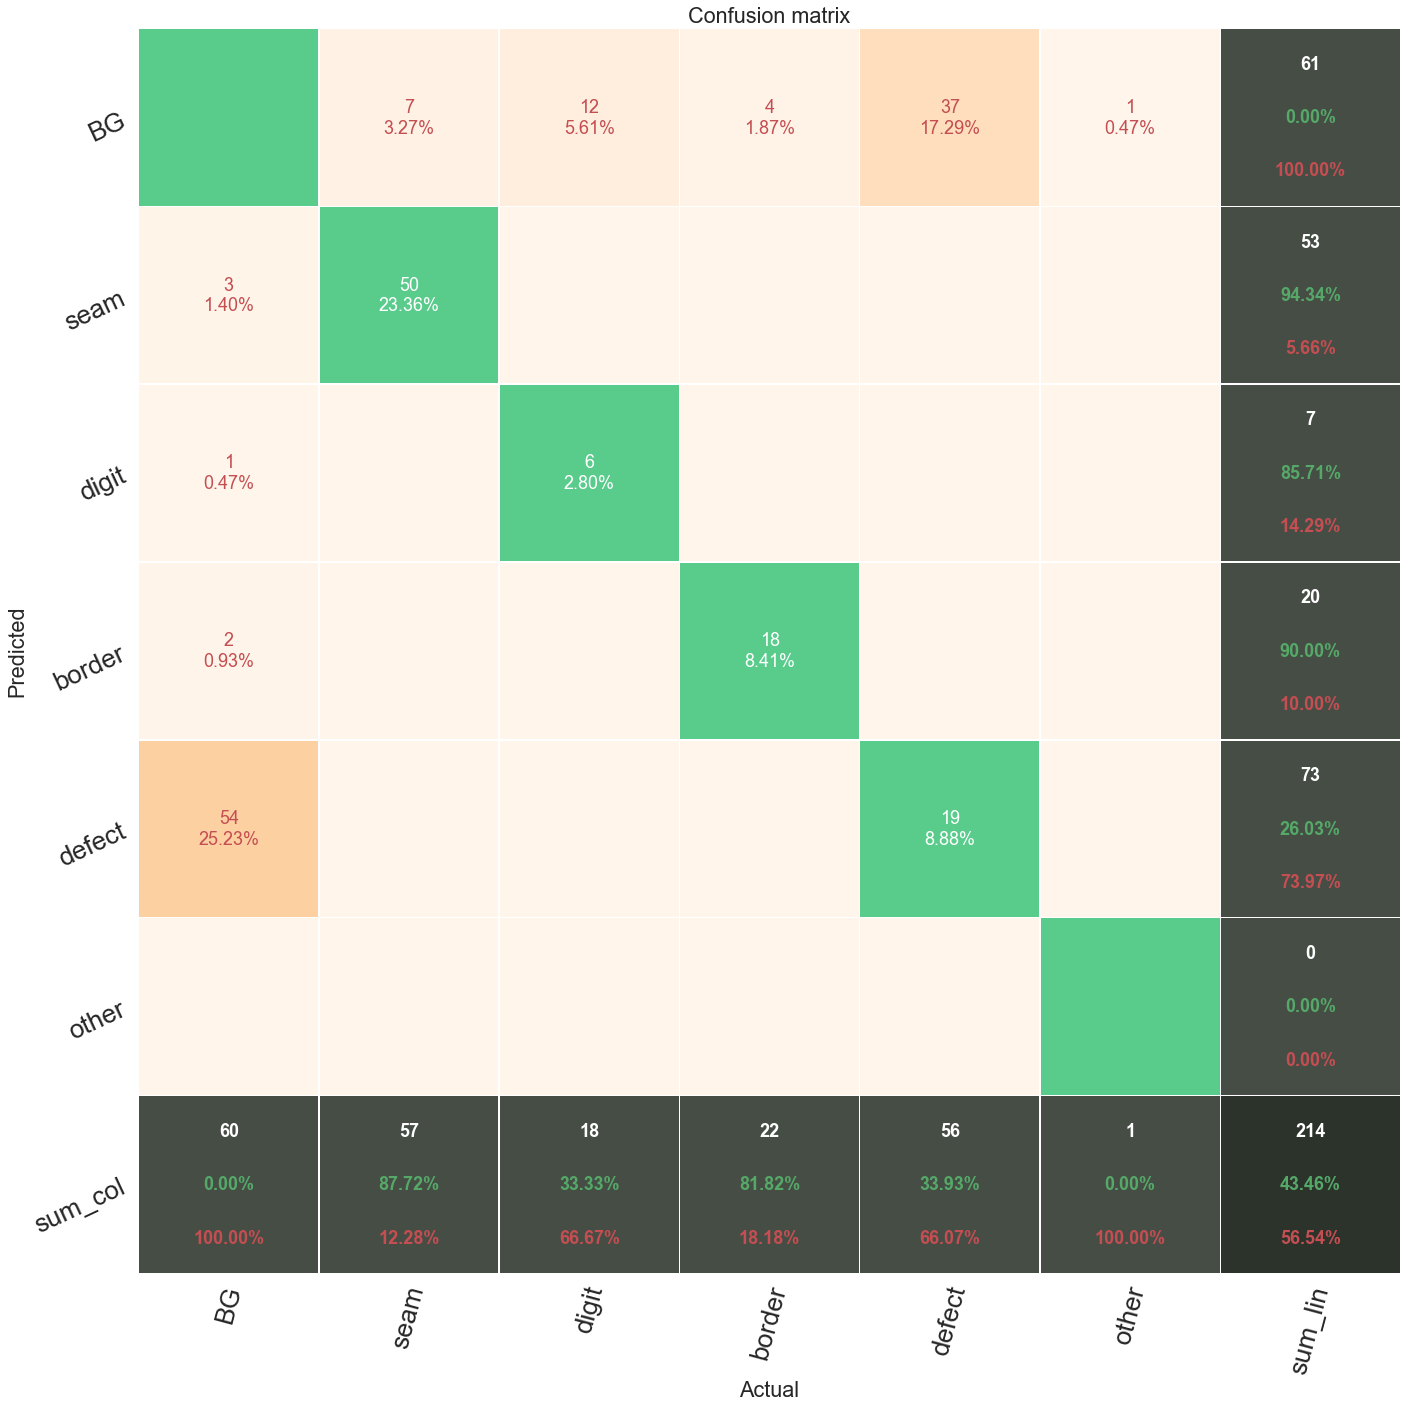

In [128]:
# Confusion matrix, 
tp,fp,fn=utils.plot_confusion_matrix_from_data(gt_tot,pred_tot, columns= ["BG","seam","digit","border","defect","other"], fz=18, figsize=(20,20), lw=0.5) #columns= ["BG","seam","digit","border","defect","other"]

In [100]:
print("Classes: BG,seam,digit,border,defect,other")
print("TP for each class :",tp)
print("FP for each class :",fp)
print("FN for each class :",fn)

#eliminate the background class (class A) from tps fns and fns lists since it doesn't concern us anymore : 
del tp[0]
del fp[0]
del fn[0]
print("\n########################\n")
print("Classes: seam,digit,border,defect,other")
print("TP for each class :",tp)
print("FP for each class :",fp)
print("FN for each class :",fn)

Classes: BG,seam,digit,border,defect,other
TP for each class : [0, 55, 70, 19, 90, 0]
FP for each class : [0, 55, 22, 24, 28, 1]
FN for each class : [15, 41, 13, 19, 42, 0]

########################

Classes: seam,digit,border,defect,other
TP for each class : [55, 70, 19, 90, 0]
FP for each class : [55, 22, 24, 28, 1]
FN for each class : [41, 13, 19, 42, 0]


# Validation dataset

In [188]:
# Reading ground true annotations
with open('./data/canclini_valid.json') as json_file:
    gt_test = json.load(json_file)
# Reading predicted annotations
with open('./data/val2017_pred_60.json') as json_file:
    pred_test = json.load(json_file)

In [189]:
# Convert JSON to dataframe
df_gt_anno = pd.DataFrame(gt_test["annotations"])
df_gt_imgs = pd.DataFrame(gt_test["images"])
df_pred = pd.DataFrame(pred_test)

In [204]:
#ground-truth and predictions lists
gt_tot = np.array([])
pred_tot = np.array([])
#mAP list
mAP_ = []

for i in range(len(df_pred)): #len(df_pred)
    gt_class_id = []
    gt_bbox = []
    pred_class_id = []
    pred_bbox = []
    img_name = df_pred['img_id'][i]
    #Extract ground thruth bboxes and cats
    if df_gt_imgs[df_gt_imgs["file_name"]==img_name]["id"].values.shape[0]>0:
        id_img = df_gt_imgs[df_gt_imgs["file_name"]==img_name]["id"].values[0]
        df_filtered = df_gt_anno[df_gt_anno["image_id"]==id_img].reset_index(drop=True)
        for j in range(len(df_filtered)):
            gt_class_id.append(df_filtered['category_id'][j])
            bbox = [df_filtered["bbox"][j][0],
            df_filtered["bbox"][j][1],
            df_filtered["bbox"][j][0]+df_filtered["bbox"][j][2],
            df_filtered["bbox"][j][1]+df_filtered["bbox"][j][3]]
            gt_bbox.append(bbox)
            #gt_bbox.append(df_filtered['bbox'][j])
        # Extract predicted bboxes and cat
        for dic in df_pred["annotations"][i]:
            pred_class_id.append(dic['category_id'])
            # Transform bbox to corners
            bbox = [dic["bbox"][0], dic["bbox"][1],
            dic["bbox"][0]+dic["bbox"][2],
            dic["bbox"][1]+dic["bbox"][3]]
            pred_bbox.append(bbox)
            #pred_bbox.append(dic["bbox"]) 

        # Visualization 
    

    gt, pred = utils.gt_pred_lists(gt_class_id, gt_bbox, pred_class_id, pred_bbox, iou_tresh = 0.3)
    gt_tot = np.append(gt_tot, gt)
    pred_tot = np.append(pred_tot, pred)

print("ground truth list : ",gt_tot)
print("predicted list : ",pred_tot)

ground truth list :  [4. 4. 4. 4. 0. 1. 1. 1. 4. 2. 2. 3. 0. 0. 0. 0. 3. 1. 1. 4. 1. 0. 4. 3.
 0. 4. 0. 0. 1. 3. 0. 1. 1. 4. 1. 0. 1. 4. 4. 0. 1. 2. 2. 2. 2. 4. 4. 1.
 1. 1. 3. 0. 1. 0. 1. 0. 1. 0. 4. 1. 1. 3. 4. 0. 0. 1. 3. 3. 3. 3. 0. 4.
 4. 3. 4. 0. 4. 4. 1. 0. 3. 3. 3. 4. 0. 0. 4. 3. 1. 4. 3. 4. 4. 4. 4. 4.
 4. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 3. 1. 0. 4. 1. 2. 2. 2. 2. 2. 0.
 0. 0. 1. 0. 1. 1. 3. 1. 3. 0. 1. 0. 4. 0. 1. 4. 0. 0. 0. 4. 0. 0. 0. 0.
 1. 2. 2. 2. 2. 2. 0. 4. 1. 4. 1. 3. 0. 0. 4. 0. 4. 1. 4. 3. 1. 1. 3. 0.
 1. 0. 1. 1. 1. 1. 3. 1. 1. 1. 4. 0. 0. 0. 4. 1. 4. 5. 1. 2. 2. 2. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 4. 1. 3. 1. 3. 1. 4. 4. 0. 3.
 3. 1. 1. 2. 0. 0. 0. 0. 0. 0. 1. 1. 4. 4. 4. 4. 1. 4. 1. 1. 0. 3. 1. 0.
 1. 4. 1. 0. 0. 1. 2. 2. 0. 0. 3. 0. 3. 4. 3. 1. 1. 2. 0. 0. 4. 4. 4. 0.
 0. 4. 3. 1. 0. 4. 4. 1. 0. 1. 4. 0. 0. 1. 1. 0. 1. 4. 1. 1. 1. 3. 0. 1.
 1. 1. 1. 4. 0. 0. 1. 4. 4. 1. 2. 4. 1. 0. 0. 1. 1. 1. 4. 0. 0. 1. 1. 1.
 4. 1. 2. 2. 2. 2. 2. 2. 3. 4.

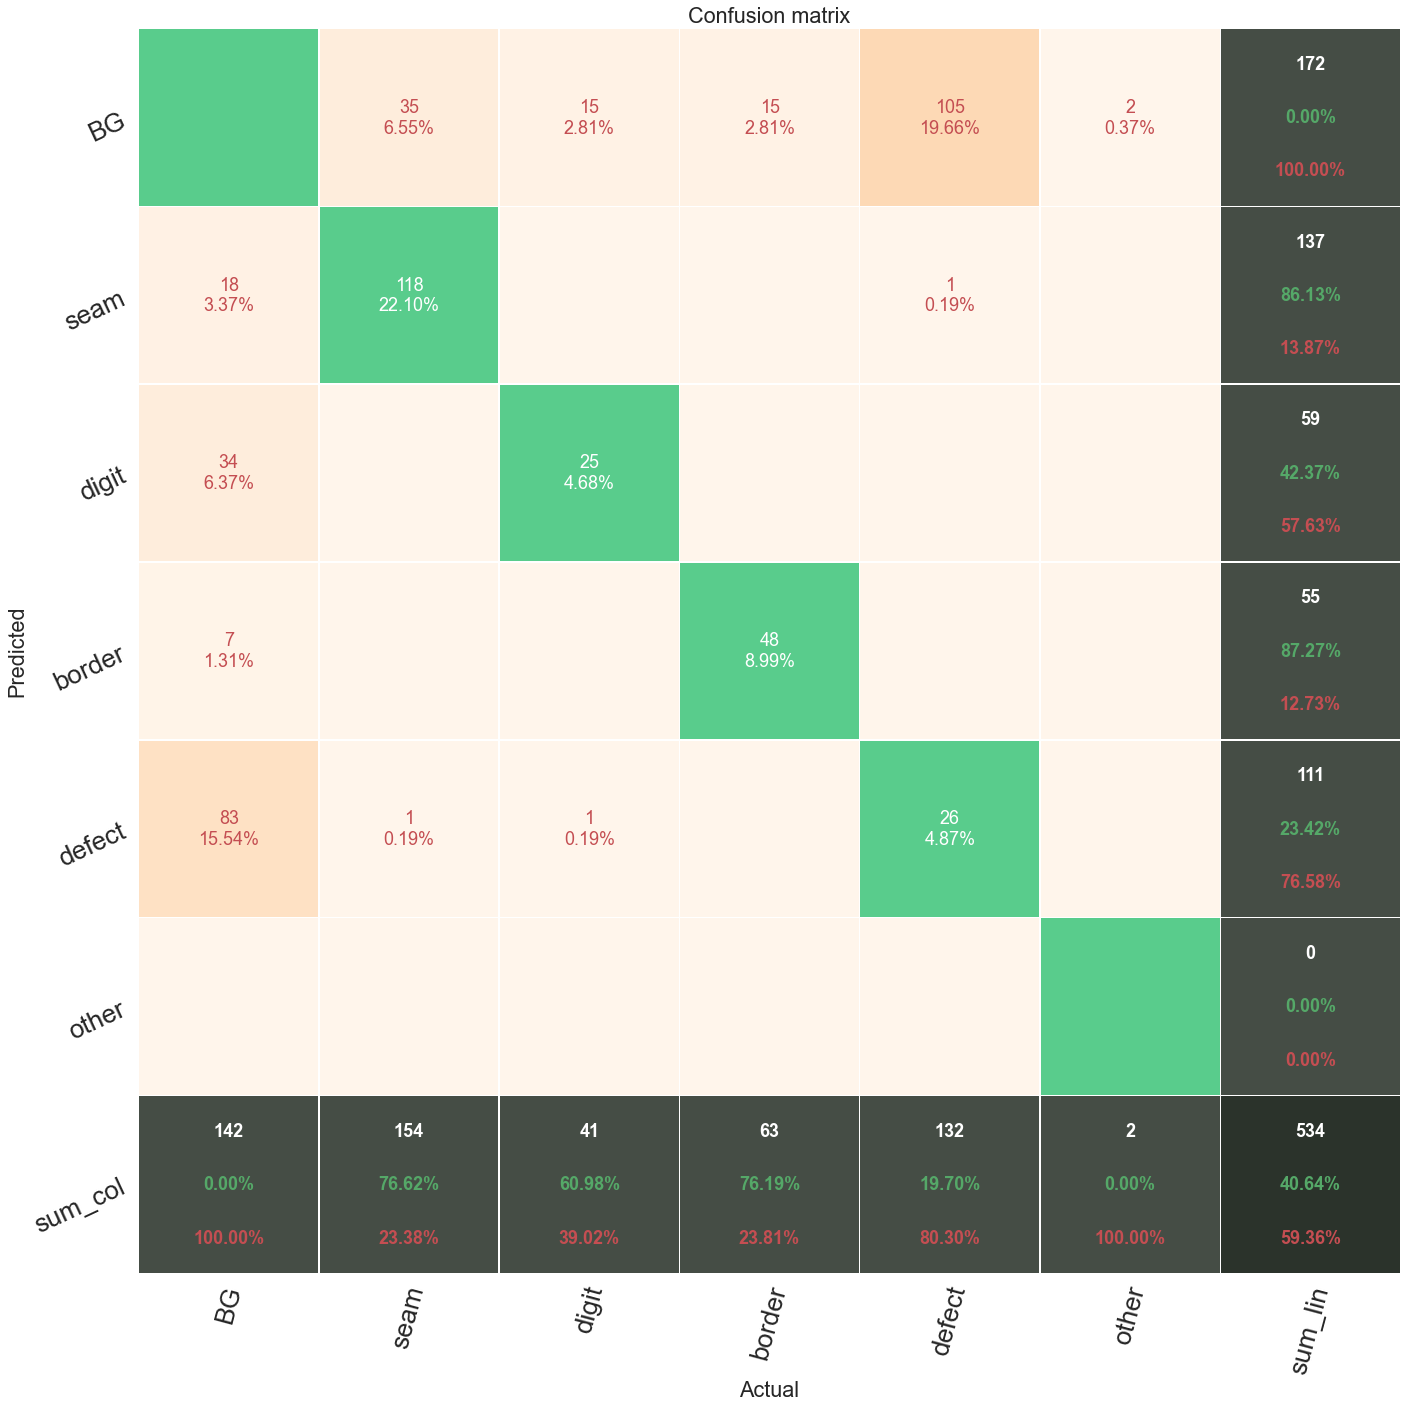

In [205]:
tp,fp,fn=utils.plot_confusion_matrix_from_data(gt_tot,pred_tot, columns= ["BG","seam","digit","border","defect","other"],fz=18, figsize=(20,20), lw=0.5)

In [206]:
print("Classes: BG,seam,digit,border,defect,other")
print("TP for each class :",tp)
print("FP for each class :",fp)
print("FN for each class :",fn)

#eliminate the background class (class A) from tps fns and fns lists since it doesn't concern us anymore : 
del tp[0]
del fp[0]
del fn[0]
print("\n########################\n")
print("Classes: seam,digit,border,defect,other")
print("TP for each class :",tp)
print("FP for each class :",fp)
print("FN for each class :",fn)

Classes: BG,seam,digit,border,defect,other
TP for each class : [0, 118, 25, 48, 26, 0]
FP for each class : [142, 36, 16, 15, 106, 2]
FN for each class : [172, 19, 34, 7, 85, 0]

########################

Classes: seam,digit,border,defect,other
TP for each class : [118, 25, 48, 26, 0]
FP for each class : [36, 16, 15, 106, 2]
FN for each class : [19, 34, 7, 85, 0]
